In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb
print(lgb.__version__)
import catboost as catb
# from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc,precision_recall_curve,f1_score, precision_score, recall_score
# from sklearn.metrics import roc_curve, roc_auc_score, auc


from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from cf_matrix import make_confusion_matrix
from sklearn.pipeline import Pipeline
from hyperopt.pyll.base import scope

import pickle
import warnings 
warnings.filterwarnings('ignore')



pd.set_option('display.max_columns', None)


4.1.0


In [5]:
#lgb_model = lgb.LGBMClassifier(random_state=42)


In [6]:
df=pd.read_csv('data_rev3.csv')
df.shape

(81315, 33)

In [7]:
df.isnull().sum()

order_day                    0
accept                       0
tos_flg                  71569
disconotice_flg              0
oam_activelogin_cnt          0
term_length                  0
called_numcalls_cnt          0
latefee_flg                  0
dwelling_type_cd             0
curr_usage                8349
product_type_cd              0
pool                     79626
automatic_payment_flg        0
weblog_flg                   0
risk_level               34733
deposit_onhand_amt       76315
ebill_enroll_flag            0
called_flg                   0
oam_flg                      0
sap_productname            208
numweblog_cnt                0
disconnects_flg              0
load_profile                 0
city                         0
zipcode                      0
home_value               60677
county                       0
tdsp                         0
dma                          0
ev_driver                    0
segment                      0
customer_id                  0
meter_id

In [8]:
df.columns

Index(['order_day', 'accept', 'tos_flg', 'disconotice_flg',
       'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd',
       'pool', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg',
       'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile',
       'city', 'zipcode', 'home_value', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'customer_id', 'meter_id'],
      dtype='object')

In [9]:
df.order_day=pd.to_datetime(df.order_day,format='%d/%m/%Y')


In [10]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id
0,2017-01-01,0,NaN,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,NaN,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745
1,2017-01-01,0,NaN,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,NaN,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319
2,2017-01-01,0,NaN,N,0,48,0,N,M,188.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202
3,2017-01-02,0,NaN,N,0,9,1,N,M,135.0,TERM,NaN,N,N,NaN,NaN,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475
4,2017-01-02,1,NaN,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,NaN,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365


In [11]:
# df['ID'] =df.customer_id.astype(str) + '_' + df['order_day'].astype(str)

In [12]:
# df=df.set_index('ID')

In [13]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id
0,2017-01-01,0,NaN,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,NaN,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745
1,2017-01-01,0,NaN,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,NaN,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319
2,2017-01-01,0,NaN,N,0,48,0,N,M,188.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202
3,2017-01-02,0,NaN,N,0,9,1,N,M,135.0,TERM,NaN,N,N,NaN,NaN,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475
4,2017-01-02,1,NaN,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,NaN,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365


In [14]:
df.risk_level.mode().values[0]

'L'

In [15]:
## Drop home_value & Pool
## Frency encoding sap_prdocutname
## city, zipcoe, county,dma -- top 3 + others

## Sometimes a hybrid approach can be useful. For example, you might treat year as a numeric feature to capture linear trends over time, while treating day of the week and month as categorical to capture their cyclical nature.

## Date Features
df['OrderYear']=df.order_day.dt.year
df['OrderMonth']=df.order_day.dt.month
df['OrderDay']=df.order_day.dt.day
df['OrderDayOfYear']=df.order_day.dt.dayofyear
df['OrderDayOfWeek']=df.order_day.dt.dayofweek
df['IsWeekend'] = df['OrderDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


## tos_flg
df.loc[df.tos_flg.isnull(),'tos_flg']='N'

## term_length
df['term_length'] = pd.to_numeric(df['term_length'], errors='coerce').fillna(0).astype(int)

## curr_usage
df['curr_usage'].fillna(0,inplace=True)

## risk_level (filling missing values by mode)
df.risk_level.fillna(df.risk_level.mode().values[0],inplace=True)

## sap_productname (filling missing values by mode)
df.sap_productname.fillna(df.sap_productname.mode().values[0],inplace=True)


## deposit_onhand_amt
df['deposit_onhand_amt'].fillna(0,inplace=True)

## Convert features to correct datatype
df['zipcode']=df['zipcode'].apply(str)
df['segment']=df['segment'].apply(str)
df['OrderMonth']=df['OrderMonth'].apply(str)
df['OrderDayOfWeek']=df['OrderDayOfWeek'].apply(str)




In [16]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id,OrderYear,OrderMonth,OrderDay,OrderDayOfYear,OrderDayOfWeek,IsWeekend
0,2017-01-01,0,N,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,0.0,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745,2017,1,1,1,6,1
1,2017-01-01,0,N,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,0.0,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319,2017,1,1,1,6,1
2,2017-01-01,0,N,N,0,48,0,N,M,188.0,TERM,NaN,N,N,L,0.0,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202,2017,1,1,1,6,1
3,2017-01-02,0,N,N,0,9,1,N,M,135.0,TERM,NaN,N,N,L,0.0,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475,2017,1,2,2,0,0
4,2017-01-02,1,N,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,0.0,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365,2017,1,2,2,0,0


In [17]:
df.dtypes

order_day                datetime64[ns]
accept                            int64
tos_flg                          object
disconotice_flg                  object
oam_activelogin_cnt               int64
term_length                       int64
called_numcalls_cnt               int64
latefee_flg                      object
dwelling_type_cd                 object
curr_usage                      float64
product_type_cd                  object
pool                             object
automatic_payment_flg            object
weblog_flg                       object
risk_level                       object
deposit_onhand_amt              float64
ebill_enroll_flag                object
called_flg                       object
oam_flg                          object
sap_productname                  object
numweblog_cnt                     int64
disconnects_flg                  object
load_profile                     object
city                             object
zipcode                          object


In [18]:
ignore_cols=['accept','pool','home_value','meter_id','customer_id','order_day']
features=[i for i in df.columns if i not in ignore_cols]
print(features)

X=df[features]
y=df['accept']

['tos_flg', 'disconotice_flg', 'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt', 'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd', 'automatic_payment_flg', 'weblog_flg', 'risk_level', 'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg', 'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile', 'city', 'zipcode', 'county', 'tdsp', 'dma', 'ev_driver', 'segment', 'OrderYear', 'OrderMonth', 'OrderDay', 'OrderDayOfYear', 'OrderDayOfWeek', 'IsWeekend']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y,shuffle=True, random_state=7)



In [20]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


In [21]:
y_train.value_counts(normalize=True)

0    0.831227
1    0.168773
Name: accept, dtype: float64

In [22]:
#y_val.value_counts(normalize=True)

In [23]:
y_test.value_counts(normalize=True)

0    0.831212
1    0.168788
Name: accept, dtype: float64

In [24]:
# df['ID']=df['customer_id'].apply(lambda x : str(x)) +'_'+df['meter_id'].apply(lambda x : str(x))+'_'+ df['order_day'].apply(lambda x : str(x))

In [25]:
X_test

,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderYear,OrderMonth,OrderDay,OrderDayOfYear,OrderDayOfWeek,IsWeekend
22630,N,N,0,12,0,N,M,472.0,TERM,Y,N,L,0.0,Y,N,Y,Reliant Secure 12 100 Wind plan,0,N,R1,HOUSTON,770244078,HARRIS,CNP,HOUSTON,N,11,2017,8,25,237,4,0
17439,N,N,0,12,0,N,M,0.0,TERM,N,N,L,0.0,N,N,N,Reliant Secure 12 plan,0,N,R2,HOUSTON,770991981,HARRIS,CNP,HOUSTON,N,3,2017,5,17,137,2,0
8440,N,N,0,12,1,N,S,0.0,TERM,N,N,L,0.0,N,Y,N,Reliant Secure 12 plan,0,N,R1,HARKER HEIGHTS,765482219,BELL,ONC,WACO-TEMPLE-BRYAN,N,6,2017,1,19,19,3,0
20339,N,N,0,12,0,N,M,0.0,TERM,N,N,L,0.0,Y,N,N,Reliant Flex plan,0,N,R2,HOUSTON,770304719,HARRIS,CNP,HOUSTON,N,11,2017,8,21,233,0,0
996,N,N,0,12,0,N,S,1160.0,TERM,N,N,L,0.0,N,N,N,Reliant Builder Power Plus 12 plan,0,N,R1,HOUSTON,77018,HARRIS,CNP,HOUSTON,N,9,2017,1,10,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51682,N,N,0,12,0,N,S,1083.0,TERM,Y,N,M,0.0,Y,N,Y,Reliant Secure Advantage 12 plan,0,N,R1,WICHITA FALLS,763024313,WICHITA,ONC,WICHITA FALLS & LAWTON,N,10,2018,12,20,354,3,0
60548,N,N,0,18,0,N,M,236.0,TERM,Y,N,L,0.0,Y,N,Y,Reliant Truly Free Weekends 18 plan,0,N,R1,HOUSTON,770141223,HARRIS,CNP,HOUSTON,N,3,2019,1,4,4,4,0
59795,N,N,0,0,0,Y,M,731.0,MTM,N,Y,L,0.0,Y,N,Y,Reliant Flex plan,5,N,R1,TYLER,757033747,SMITH,ONC,TYLER-LONGVIEW(LFKN&NCGD),N,3,2019,1,4,4,4,0
79980,N,N,0,0,0,N,S,963.0,MTM,Y,N,M,0.0,Y,N,Y,Reliant Flex plan,0,N,R1,PEARLAND,77584,BRAZORIA,CNP,HOUSTON,N,11,2020,11,30,335,0,0


In [26]:
X_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

## Feature Engineering

- sap_productname : Frequency or Count Encoding: Replace each category with its frequency (or count) in the dataset. 
- 'city', 'zipcode', 'county', dma : Only considering top 3 categories from these features and clubbing evrything else in 'other' category.


## sap_productname transfromation

In [27]:
sap_productname_frequency_map = X_train['sap_productname'].value_counts().to_dict()
# print(sap_productname_frequency_map)

In [28]:
# Save the mapping
with open('sap_productname_freq_map.json', 'w') as file:
    json.dump(sap_productname_frequency_map, file)

In [29]:
# Map frequencies to the categories in train, test, and validation sets
X_train['sap_productname'] = X_train['sap_productname'].map(sap_productname_frequency_map)
X_test['sap_productname'] = X_test['sap_productname'].map(sap_productname_frequency_map)
#X_val['sap_productname'] = X_val['sap_productname'].map(sap_productname_frequency_map)

# Handling missing values if any category in test/val is not present in train
X_test['sap_productname'].fillna(0, inplace=True)
#X_val['sap_productname'].fillna(0, inplace=True)


X_train['sap_productname'] = X_train['sap_productname'].astype(np.int64)
X_test['sap_productname'] = X_test['sap_productname'].astype(np.int64)
#X_val['sap_productname'] = X_val['sap_productname'].astype(np.int64)

In [30]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


In [31]:
# Identifying numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

ctgy_cols = X_train.select_dtypes(include=['object']).columns
print('num Columns: {} \n\nctgy columns: {}'.format(num_cols,ctgy_cols))

num Columns: Index(['oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'curr_usage', 'deposit_onhand_amt', 'sap_productname', 'numweblog_cnt',
       'OrderYear', 'OrderDay', 'OrderDayOfYear', 'IsWeekend'],
      dtype='object') 

ctgy columns: Index(['tos_flg', 'disconotice_flg', 'latefee_flg', 'dwelling_type_cd',
       'product_type_cd', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'ebill_enroll_flag', 'called_flg', 'oam_flg', 'disconnects_flg',
       'load_profile', 'city', 'zipcode', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'OrderMonth', 'OrderDayOfWeek'],
      dtype='object')


In [32]:
X_train.head()

,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderYear,OrderMonth,OrderDay,OrderDayOfYear,OrderDayOfWeek,IsWeekend
76413,N,N,0,0,0,N,S,217.0,MTM,N,N,L,75.0,N,N,N,12643,0,N,R2,MCKINNEY,750692660,COLLIN,ONC,DALLAS-FT. WORTH,N,4,2020,11,11,316,2,0
78324,N,N,0,20,0,N,S,1081.0,TERM,N,N,L,0.0,Y,N,Y,1347,0,N,R2,HUMBLE,773381628,HARRIS,CNP,HOUSTON,N,6,2020,11,19,324,3,0
69788,N,N,0,0,0,Y,M,352.0,MTM,N,N,L,0.0,Y,N,Y,12643,0,N,R1,HOUSTON,770494346,HARRIS,CNP,HOUSTON,N,3,2020,2,3,34,0,0
28001,N,N,0,24,0,N,S,1550.0,TERM,Y,N,L,0.0,Y,N,Y,62,0,N,R2,PEARLAND,775817107,BRAZORIA,CNP,HOUSTON,N,12,2017,9,5,248,1,0
46234,N,N,0,12,1,N,S,923.0,TERM,Y,N,L,0.0,Y,Y,Y,7143,0,N,R2,HOUSTON,77007,HARRIS,CNP,HOUSTON,N,9,2018,5,31,151,3,0


## Features with multiples categories only cosindering top 3 based on count remaining clubbed into'other' categiory

In [33]:
top_3_city = X_train['city'].value_counts().nlargest(3).index
top_3_zipcode = X_train['zipcode'].value_counts().nlargest(3).index
top_3_county = X_train['county'].value_counts().nlargest(3).index
top_3_dma = X_train['dma'].value_counts().nlargest(3).index


In [34]:
## city
X_train['city'] = X_train['city'].apply(lambda x: x if x in top_3_city else 'Other')
X_test['city'] = X_test['city'].apply(lambda x: x if x in top_3_city else 'Other')
#X_val['city'] = X_val['city'].apply(lambda x: x if x in top_3_city else 'Other')

## zipcode
X_train['zipcode'] = X_train['zipcode'].apply(lambda x: x if x in top_3_zipcode else 'Other')
X_test['zipcode'] = X_test['zipcode'].apply(lambda x: x if x in top_3_zipcode else 'Other')
#X_val['zipcode'] = X_val['zipcode'].apply(lambda x: x if x in top_3_zipcode else 'Other')

## county
X_train['county'] = X_train['county'].apply(lambda x: x if x in top_3_county else 'Other')
X_test['county'] = X_test['county'].apply(lambda x: x if x in top_3_county else 'Other')
#X_val['county'] = X_val['county'].apply(lambda x: x if x in top_3_county else 'Other')

## dma
X_train['dma'] = X_train['dma'].apply(lambda x: x if x in top_3_dma else 'Other')
X_test['dma'] = X_test['dma'].apply(lambda x: x if x in top_3_dma else 'Other')
#X_val['dma'] = X_val['dma'].apply(lambda x: x if x in top_3_dma else 'Other')

In [35]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


In [36]:
X_train.city.value_counts()

Other         38273
HOUSTON       19710
DALLAS         4361
FORT WORTH     2708
Name: city, dtype: int64

In [37]:
X_train.zipcode.value_counts()

Other    64510
77449      234
77469      158
77494      150
Name: zipcode, dtype: int64

In [38]:
top_categories = {
    'top_3_city': top_3_city.tolist(),
    'top_3_zipcode': top_3_zipcode.tolist(),
    'top_3_county': top_3_county.tolist(),
    'top_3_dma': top_3_dma.tolist()
}

## Saving for production
with open('top_categories.json', 'w') as file:
    json.dump(top_categories, file)

In [39]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


## Label Encoding --> One Hot Encoding for categorical features

In [40]:
# Function for Label Encoding multiple columns
def label_encode_multiple_columns(train, test, columns):
    encoders = {}
    for column in columns:
        # print('Issue column:{}'.format(column))
        le = OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=-1)
        # Fit on the train data and transform all datasets
        train[column] = le.fit_transform(np.array(train[column]).reshape(-1, 1))
        test[column] = le.transform(np.array(test[column]).reshape(-1, 1))
        #val[column] = le.transform(val[column])
        encoders[column] = le
    return encoders

# Function for One-Hot Encoding multiple columns
def one_hot_encode_multiple_columns(train, test, columns):
    #ohe = OneHotEncoder(handle_unknown='ignore', sparse=False,drop='first')
    ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
    ohe.fit(train[columns])

    # Transform and create DataFrame from the encoded arrays
    def transform_and_create_df(data, columns):
        encoded = ohe.transform(data[columns])
        encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(), index=data.index)
        return data.drop(columns, axis=1).join(encoded_df)

    return transform_and_create_df(train, columns), transform_and_create_df(test, columns)

# Assuming X_train, X_test, X_val are your datasets
# label_columns = ['tos_flg', 'disconotice_flg']
# one_hot_columns = ['tos_flg', 'disconotice_flg']

label_columns = ctgy_cols
one_hot_columns = ctgy_cols
# Apply Label Encoding and One-Hot Encoding
label_encoders = label_encode_multiple_columns(X_train, X_test, label_columns)


In [41]:
X_train

,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderYear,OrderMonth,OrderDay,OrderDayOfYear,OrderDayOfWeek,IsWeekend
76413,0.0,0.0,0,0,0,0.0,1.0,217.0,0.0,0.0,0.0,1.0,75.0,0.0,0.0,0.0,12643,0,0.0,3.0,3.0,3.0,2.0,2.0,0.0,0.0,6.0,2020,2.0,11,316,2.0,0
78324,0.0,0.0,0,20,0,0.0,1.0,1081.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1347,0,0.0,3.0,3.0,3.0,1.0,0.0,1.0,0.0,8.0,2020,2.0,19,324,3.0,0
69788,0.0,0.0,0,0,0,1.0,0.0,352.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,12643,0,0.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,5.0,2020,4.0,3,34,0.0,0
28001,0.0,0.0,0,24,0,0.0,1.0,1550.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,62,0,0.0,3.0,3.0,3.0,2.0,0.0,1.0,0.0,3.0,2017,11.0,5,248,1.0,0
46234,0.0,0.0,0,12,1,0.0,1.0,923.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,7143,0,0.0,3.0,2.0,3.0,1.0,0.0,1.0,0.0,11.0,2018,7.0,31,151,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72398,0.0,0.0,0,0,1,0.0,1.0,1058.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1650,0,0.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,3.0,2020,10.0,26,239,2.0,0
4998,0.0,0.0,0,12,0,0.0,1.0,868.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7143,0,0.0,3.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,2017,0.0,13,13,4.0,0
66265,0.0,1.0,0,16,0,0.0,1.0,1052.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,110,1,0.0,3.0,3.0,3.0,3.0,2.0,0.0,0.0,2.0,2019,5.0,5,64,1.0,0
63985,0.0,0.0,0,16,0,0.0,1.0,1086.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,110,0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,4.0,2019,0.0,5,5,5.0,1


## Prod encoding files

In [42]:
for col, le in label_encoders.items():
    with open(f'label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(le, file)

In [43]:
X_train_dt = X_train.copy()
X_test_dt = X_test.copy()

In [44]:
X_train, X_test = one_hot_encode_multiple_columns(X_train, X_test, one_hot_columns)

In [45]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 95)--y_train Shape:(65052,)
X_test Shape:(16263, 95)--y_test Shape:(16263,)


In [46]:
X_train

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend,tos_flg_0.0,tos_flg_1.0,disconotice_flg_0.0,disconotice_flg_1.0,latefee_flg_0.0,latefee_flg_1.0,dwelling_type_cd_0.0,dwelling_type_cd_1.0,product_type_cd_0.0,product_type_cd_1.0,automatic_payment_flg_0.0,automatic_payment_flg_1.0,weblog_flg_0.0,weblog_flg_1.0,risk_level_0.0,risk_level_1.0,risk_level_2.0,ebill_enroll_flag_0.0,ebill_enroll_flag_1.0,called_flg_0.0,called_flg_1.0,oam_flg_0.0,oam_flg_1.0,disconnects_flg_0.0,disconnects_flg_1.0,load_profile_0.0,load_profile_1.0,load_profile_2.0,load_profile_3.0,load_profile_4.0,city_0.0,city_1.0,city_2.0,city_3.0,zipcode_0.0,zipcode_1.0,zipcode_2.0,zipcode_3.0,county_0.0,county_1.0,county_2.0,county_3.0,tdsp_0.0,tdsp_1.0,tdsp_2.0,tdsp_3.0,tdsp_4.0,dma_0.0,dma_1.0,dma_2.0,dma_3.0,ev_driver_0.0,ev_driver_1.0,segment_0.0,segment_1.0,segment_2.0,segment_3.0,segment_4.0,segment_5.0,segment_6.0,segment_7.0,segment_8.0,segment_9.0,segment_10.0,segment_11.0,OrderMonth_0.0,OrderMonth_1.0,OrderMonth_2.0,OrderMonth_3.0,OrderMonth_4.0,OrderMonth_5.0,OrderMonth_6.0,OrderMonth_7.0,OrderMonth_8.0,OrderMonth_9.0,OrderMonth_10.0,OrderMonth_11.0,OrderDayOfWeek_0.0,OrderDayOfWeek_1.0,OrderDayOfWeek_2.0,OrderDayOfWeek_3.0,OrderDayOfWeek_4.0,OrderDayOfWeek_5.0,OrderDayOfWeek_6.0
76413,0,0,0,217.0,75.0,12643,0,2020,11,316,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
78324,0,20,0,1081.0,0.0,1347,0,2020,19,324,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69788,0,0,0,352.0,0.0,12643,0,2020,3,34,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28001,0,24,0,1550.0,0.0,62,0,2017,5,248,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46234,0,12,1,923.0,0.0,7143,0,2018,31,151,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72398,0,0,1,1058.0,0.0,1650,0,2020,26,239,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [47]:
X_train[num_cols]

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend
76413,0,0,0,217.0,75.0,12643,0,2020,11,316,0
78324,0,20,0,1081.0,0.0,1347,0,2020,19,324,0
69788,0,0,0,352.0,0.0,12643,0,2020,3,34,0
28001,0,24,0,1550.0,0.0,62,0,2017,5,248,0
46234,0,12,1,923.0,0.0,7143,0,2018,31,151,0
...,...,...,...,...,...,...,...,...,...,...,...
72398,0,0,1,1058.0,0.0,1650,0,2020,26,239,0
4998,0,12,0,868.0,0.0,7143,0,2017,13,13,0
66265,0,16,0,1052.0,0.0,110,1,2019,5,64,0
63985,0,16,0,1086.0,0.0,110,0,2019,5,5,1


## Numerical Preprocessing

In [48]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train[num_cols])

# Transform the test and validation data using the same scaler
X_test_scaled = scaler.transform(X_test[num_cols])
#X_val_scaled = scaler.transform(X_val[num_cols])

In [49]:
with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [50]:
X_train_scaled =pd.DataFrame(X_train_scaled,columns=num_cols,index=X_train.index)
X_test_scaled =pd.DataFrame(X_test_scaled,columns=num_cols,index=X_test.index)
#X_val_scaled =pd.DataFrame(X_val_scaled,columns=num_cols,index=X_val.index)

In [51]:
X_train_scaled

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend
76413,0.0,0.000000,0.000000,0.055531,0.042857,1.000000,0.000000,1.000000,0.333333,0.865385,0.0
78324,0.0,0.202020,0.000000,0.120366,0.000000,0.106470,0.000000,1.000000,0.600000,0.887363,0.0
69788,0.0,0.000000,0.000000,0.065661,0.000000,1.000000,0.000000,1.000000,0.066667,0.090659,0.0
28001,0.0,0.242424,0.000000,0.155561,0.000000,0.004825,0.000000,0.000000,0.133333,0.678571,0.0
46234,0.0,0.121212,0.043478,0.108510,0.000000,0.564942,0.000000,0.333333,1.000000,0.412088,0.0
...,...,...,...,...,...,...,...,...,...,...,...
72398,0.0,0.000000,0.043478,0.118640,0.000000,0.130438,0.000000,1.000000,0.833333,0.653846,0.0
4998,0.0,0.121212,0.000000,0.104382,0.000000,0.564942,0.000000,0.000000,0.400000,0.032967,0.0
66265,0.0,0.161616,0.000000,0.118190,0.000000,0.008622,0.014085,0.666667,0.133333,0.173077,0.0
63985,0.0,0.161616,0.000000,0.120741,0.000000,0.008622,0.000000,0.666667,0.133333,0.010989,1.0


In [52]:
X_train.drop(num_cols,axis=1,inplace=True)
X_test.drop(num_cols,axis=1,inplace=True)

X_train_dt.drop(num_cols,axis=1,inplace=True)
X_test_dt.drop(num_cols,axis=1,inplace=True)
#X_val.drop(num_cols,axis=1,inplace=True)

In [53]:
X_train_ohe=X_train_scaled.join(X_train)
X_test_ohe=X_train_scaled.join(X_test)

X_train_dt=X_train_scaled.join(X_train_dt)
X_test_dt=X_test_scaled.join(X_test_dt)
#X_val=X_train_scaled.join(X_val)

In [54]:
X_train_ohe.shape

(65052, 95)

In [55]:
X_train_ohe.head()

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend,tos_flg_0.0,tos_flg_1.0,disconotice_flg_0.0,disconotice_flg_1.0,latefee_flg_0.0,latefee_flg_1.0,dwelling_type_cd_0.0,dwelling_type_cd_1.0,product_type_cd_0.0,product_type_cd_1.0,automatic_payment_flg_0.0,automatic_payment_flg_1.0,weblog_flg_0.0,weblog_flg_1.0,risk_level_0.0,risk_level_1.0,risk_level_2.0,ebill_enroll_flag_0.0,ebill_enroll_flag_1.0,called_flg_0.0,called_flg_1.0,oam_flg_0.0,oam_flg_1.0,disconnects_flg_0.0,disconnects_flg_1.0,load_profile_0.0,load_profile_1.0,load_profile_2.0,load_profile_3.0,load_profile_4.0,city_0.0,city_1.0,city_2.0,city_3.0,zipcode_0.0,zipcode_1.0,zipcode_2.0,zipcode_3.0,county_0.0,county_1.0,county_2.0,county_3.0,tdsp_0.0,tdsp_1.0,tdsp_2.0,tdsp_3.0,tdsp_4.0,dma_0.0,dma_1.0,dma_2.0,dma_3.0,ev_driver_0.0,ev_driver_1.0,segment_0.0,segment_1.0,segment_2.0,segment_3.0,segment_4.0,segment_5.0,segment_6.0,segment_7.0,segment_8.0,segment_9.0,segment_10.0,segment_11.0,OrderMonth_0.0,OrderMonth_1.0,OrderMonth_2.0,OrderMonth_3.0,OrderMonth_4.0,OrderMonth_5.0,OrderMonth_6.0,OrderMonth_7.0,OrderMonth_8.0,OrderMonth_9.0,OrderMonth_10.0,OrderMonth_11.0,OrderDayOfWeek_0.0,OrderDayOfWeek_1.0,OrderDayOfWeek_2.0,OrderDayOfWeek_3.0,OrderDayOfWeek_4.0,OrderDayOfWeek_5.0,OrderDayOfWeek_6.0
76413,0.0,0.000000,0.000000,0.055531,0.042857,1.000000,0.0,1.000000,0.333333,0.865385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
78324,0.0,0.202020,0.000000,0.120366,0.000000,0.106470,0.0,1.000000,0.600000,0.887363,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69788,0.0,0.000000,0.000000,0.065661,0.000000,1.000000,0.0,1.000000,0.066667,0.090659,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28001,0.0,0.242424,0.000000,0.155561,0.000000,0.004825,0.0,0.000000,0.133333,0.678571,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46234,0.0,0.121212,0.043478,0.108510,0.000000,0.564942,0.0,0.333333,1.000000,0.412088,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
X_train_dt.shape

(65052, 33)

In [57]:
X_test_dt.shape

(16263, 33)

In [58]:
X_train_dt.head()

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend,tos_flg,disconotice_flg,latefee_flg,dwelling_type_cd,product_type_cd,automatic_payment_flg,weblog_flg,risk_level,ebill_enroll_flag,called_flg,oam_flg,disconnects_flg,load_profile,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderMonth,OrderDayOfWeek
76413,0.0,0.000000,0.000000,0.055531,0.042857,1.000000,0.0,1.000000,0.333333,0.865385,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,2.0,0.0,0.0,6.0,2.0,2.0
78324,0.0,0.202020,0.000000,0.120366,0.000000,0.106470,0.0,1.000000,0.600000,0.887363,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,3.0,1.0,0.0,1.0,0.0,8.0,2.0,3.0
69788,0.0,0.000000,0.000000,0.065661,0.000000,1.000000,0.0,1.000000,0.066667,0.090659,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,5.0,4.0,0.0
28001,0.0,0.242424,0.000000,0.155561,0.000000,0.004825,0.0,0.000000,0.133333,0.678571,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,3.0,2.0,0.0,1.0,0.0,3.0,11.0,1.0
46234,0.0,0.121212,0.043478,0.108510,0.000000,0.564942,0.0,0.333333,1.000000,0.412088,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,3.0,1.0,0.0,1.0,0.0,11.0,7.0,3.0


In [60]:
X_train_ohe.shape

(65052, 95)

In [61]:
X_train_dt.shape

(65052, 33)

In [63]:
y_train.shape

(65052,)

## Split Train-Validation

In [71]:
X_train_for_dt, X_val_for_dt, y_train_for_dt, y_val_for_dt = train_test_split(X_train_dt,y_train, test_size=0.2,stratify=y_train,shuffle=True, random_state=7)
X_train_non_dt, X_val_non_dt, y_train_non_dt, y_val_non_dt = train_test_split(X_train_ohe,y_train, test_size=0.2,stratify=y_train,shuffle=True, random_state=7)


## Tree based Models

In [72]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train_for_dt.shape,y_train_for_dt.shape))
print('X_val Shape:{}--y_val Shape:{}'.format(X_val_for_dt.shape,y_val_for_dt.shape))
# print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(52041, 33)--y_train Shape:(52041,)
X_val Shape:(13011, 33)--y_val Shape:(13011,)


## Non tree models

In [73]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train_non_dt.shape,y_train_non_dt.shape))
print('X_val Shape:{}--y_val Shape:{}'.format(X_val_non_dt.shape,y_val_non_dt.shape))
# print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(52041, 95)--y_train Shape:(52041,)
X_val Shape:(13011, 95)--y_val Shape:(13011,)


## Modelling

### Logistic Regression


In [74]:

%%time
clf_logistic = LogisticRegression()

metrics = ['accuracy', 'neg_log_loss','roc_auc','f1','precision', 'recall',]
scores = cross_validate(clf_logistic, X_train_ohe, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))

LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision'].mean()
LR_recall = scores['test_recall'].mean()
LR_f1 = scores['test_f1'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.86
LogLoss: -0.29
AUC: 0.89
F1: 0.52
CPU times: user 28.3 s, sys: 4.07 s, total: 32.4 s
Wall time: 4.44 s


### Address Class Imbalance
***
Broadly there are 2 techniques to handle class Imbalance

**Resampling**
***
-  UnderSampling
-  OverSampling 
-  SMOTE

<br>**Algorithmic Ensemble Techniques**
***
-  Bagging
-  Boosting
-  class_weights='balanced'

We will be evealuating model based on precison , recall & AUCPR(Area under Precision Recall Curve)

## Resampling

In [78]:
def pr_auc_score(clf, x, y):
    '''
        This function computes area under the precision-recall curve. 
    '''
      
    precisions, recalls,_ = precision_recall_curve(y, clf.predict_proba(x)[:,1], pos_label=1)
    
    return auc(recalls, precisions)

In [84]:
def resample_data(clf, x, y, cv, scoring, sampler):
    '''
        This function computes the cross-validation score of a given 
        classifier using a choice of sampling function to mitigate 
        the class imbalance, and stratified k-fold sampling.
        
        The first five arguments are the same as 
        sklearn.model_selection.cross_val_score.
        
        - clf.predict_proba(x) returns class label probabilities
        - clf.fit(x,y) trains the model
        
        - x = data
        
        - y = labels
        
        - cv = the number of folds in the cross validation
        
        - scoring(classifier, x, y) returns a float
        
        The last argument is a choice of random sampler: an object 
        similar to the sampler objects available from the python 
        package imbalanced-learn. In particular, this 
        object needs to have the method:
        
        sampler.fit_sample(x,y)
        
    '''
    
    cv_score = 0.
    train_score = 0.
    test_score = 0.
    
    # stratified k-fold creates folds with the same ratio of positive 
    # and negative samples as the entire dataset.
    
    skf = StratifiedKFold(n_splits=cv,  shuffle=False)
    
    for train_idx, test_idx in skf.split(x,y):
        #print(train_idx,test_idx)
        xfold_train_sampled, yfold_train_sampled = sampler.fit_resample(x.iloc[train_idx],y.iloc[train_idx])
        clf.fit(xfold_train_sampled, yfold_train_sampled)
        
        train_score = scoring(clf, xfold_train_sampled, yfold_train_sampled)
        test_score  = scoring(clf, x.iloc[test_idx], y.iloc[test_idx])
        
        print("Train AUPRC: %.2f Test AUPRC: %.2f"%(train_score,test_score))

        cv_score += test_score
        
    return cv_score/cv

In [76]:
cv = 5

lgr_clf    = LogisticRegression()
rf_clf = RandomForestClassifier()
xgb_clf      = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

## Logistic Regression + Resampling
- Oversampling
- SMOTE : Synthetic Minority Oversampling Technique
- ADASYN : Adaptive Synthetic Sampling
- UnderSampling


In [87]:
# Logistic regression score with Random Over-sampling
print("Random over-sampling")
score = resample_data(lgr_clf, X_train_ohe, y_train, cv, pr_auc_score, RandomOverSampler())
print("Cross-validated AUPRC score: %.2f"%score)

# Logistic regression score with SMOTE
print("SMOTE over-sampling")
score = resample_data(lgr_clf, X_train_ohe, y_train, cv, pr_auc_score, SMOTE())
print("Cross-validated AUPRC score: %.2f"%score)

# Logistic regression score with ADASYN
print("ADASYN over-sampling")
score = resample_data(lgr_clf, X_train_ohe, y_train, cv, pr_auc_score, ADASYN())
print("Cross-validated AUPRC score: %.2f"%score)

# Logistic regression score with Random Under Sampling
print("Random under-sampling")
score = resample_data(lgr_clf, X_train_ohe, y_train, cv, pr_auc_score, RandomUnderSampler())
print("Cross-validated AUPRC score: %.2f"%score)

Random over-sampling
Train AUPRC: 0.85 Test AUPRC: 0.52
Train AUPRC: 0.84 Test AUPRC: 0.56
Train AUPRC: 0.85 Test AUPRC: 0.54
Train AUPRC: 0.85 Test AUPRC: 0.53
Train AUPRC: 0.85 Test AUPRC: 0.54
Cross-validated AUPRC score: 0.54
SMOTE over-sampling
Train AUPRC: 0.86 Test AUPRC: 0.53
Train AUPRC: 0.85 Test AUPRC: 0.58
Train AUPRC: 0.86 Test AUPRC: 0.55
Train AUPRC: 0.86 Test AUPRC: 0.54
Train AUPRC: 0.86 Test AUPRC: 0.55
Cross-validated AUPRC score: 0.55
ADASYN over-sampling
Train AUPRC: 0.84 Test AUPRC: 0.52
Train AUPRC: 0.83 Test AUPRC: 0.56
Train AUPRC: 0.84 Test AUPRC: 0.54
Train AUPRC: 0.84 Test AUPRC: 0.54
Train AUPRC: 0.84 Test AUPRC: 0.54
Cross-validated AUPRC score: 0.54
Random under-sampling
Train AUPRC: 0.85 Test AUPRC: 0.52
Train AUPRC: 0.84 Test AUPRC: 0.56
Train AUPRC: 0.85 Test AUPRC: 0.53
Train AUPRC: 0.85 Test AUPRC: 0.52
Train AUPRC: 0.85 Test AUPRC: 0.54
Cross-validated AUPRC score: 0.53


##### Observations:
***
-  SMOTE over-sampling have hightest score of Cross-validated AUPRC score: 0.54
-  Random under-sampling have the lowest value of 0.53 , which seems plausible due to loss of information
***

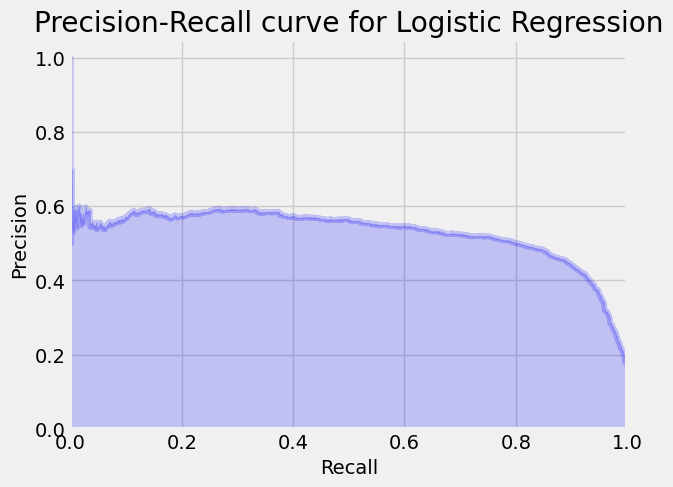

In [90]:
sampler = SMOTE()
skf = StratifiedKFold(n_splits=cv,  shuffle=False)
clf = lgr_clf

train_idx, test_idx = skf.split(X_train_ohe, y_train).__next__()
#print(train_idx)
xfold_train_sampled, yfold_train_sampled = sampler.fit_resample(X_train_ohe.iloc[train_idx],y_train.iloc[train_idx])

clf.fit(xfold_train_sampled, yfold_train_sampled)

precisions, recalls,_ = precision_recall_curve(y_train.iloc[test_idx], clf.predict_proba(X_train_ohe.iloc[test_idx])[:,1], pos_label=1)

plt.step(recalls, precisions, color='b', alpha=0.2,
         where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Logistic Regression')
plt.show()

## Random Forest + Resample

In [91]:
# RF score with Random Over-sampling
print("Random over-sampling")
score = resample_data(rf_clf, X_train_dt, y_train, cv, pr_auc_score, RandomOverSampler())
print("Cross-validated AUPRC score: %.2f"%score)

# RF score with SMOTE
print("SMOTE over-sampling")
score = resample_data(rf_clf, X_train_dt, y_train, cv, pr_auc_score, SMOTE())
print("Cross-validated AUPRC score: %.2f"%score)

# RF score with ADASYN
print("ADASYN over-sampling")
score = resample_data(rf_clf, X_train_dt, y_train, cv, pr_auc_score, ADASYN())
print("Cross-validated AUPRC score: %.2f"%score)

# RF score with Random Under Sampling
print("Random under-sampling")
score = resample_data(rf_clf, X_train_dt, y_train, cv, pr_auc_score, RandomUnderSampler())
print("Cross-validated AUPRC score: %.2f"%score)

Random over-sampling
Train AUPRC: 1.00 Test AUPRC: 0.70
Train AUPRC: 1.00 Test AUPRC: 0.71
Train AUPRC: 1.00 Test AUPRC: 0.71
Train AUPRC: 1.00 Test AUPRC: 0.72
Train AUPRC: 1.00 Test AUPRC: 0.69
Cross-validated AUPRC score: 0.71
SMOTE over-sampling
Train AUPRC: 1.00 Test AUPRC: 0.69
Train AUPRC: 1.00 Test AUPRC: 0.70
Train AUPRC: 1.00 Test AUPRC: 0.70
Train AUPRC: 1.00 Test AUPRC: 0.71
Train AUPRC: 1.00 Test AUPRC: 0.69
Cross-validated AUPRC score: 0.70
ADASYN over-sampling
Train AUPRC: 1.00 Test AUPRC: 0.69
Train AUPRC: 1.00 Test AUPRC: 0.71
Train AUPRC: 1.00 Test AUPRC: 0.70
Train AUPRC: 1.00 Test AUPRC: 0.71
Train AUPRC: 1.00 Test AUPRC: 0.69
Cross-validated AUPRC score: 0.70
Random under-sampling
Train AUPRC: 1.00 Test AUPRC: 0.69
Train AUPRC: 1.00 Test AUPRC: 0.71
Train AUPRC: 1.00 Test AUPRC: 0.70
Train AUPRC: 1.00 Test AUPRC: 0.70
Train AUPRC: 1.00 Test AUPRC: 0.70
Cross-validated AUPRC score: 0.70


##### Observations:
***
-  Random over Sampling have high AUPRC score: 0.71 may be overfitting, followed by SMOTE of score 0.70
-  Random Forest models seems to be doing better than Logistic Regression wrt AUPRC
***

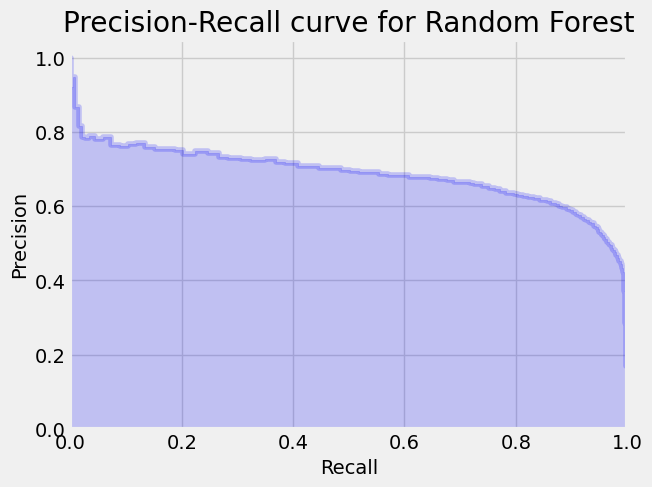

In [94]:
sampler = SMOTE()
skf = StratifiedKFold(n_splits=cv,  shuffle=False)
clf = rf_clf

train_idx, test_idx = skf.split(X_train_dt, y_train).__next__()
#print(train_idx)
xfold_train_sampled, yfold_train_sampled = sampler.fit_resample(X_train_dt.iloc[train_idx],y_train.iloc[train_idx])

clf.fit(xfold_train_sampled, yfold_train_sampled)

precisions, recalls,_ = precision_recall_curve(y_train.iloc[test_idx], clf.predict_proba(X_train_dt.iloc[test_idx])[:,1], pos_label=1)

plt.step(recalls, precisions, color='b', alpha=0.2,
         where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Random Forest')
plt.show()

## XgBoost + Resample

In [95]:
# XGB score with Random Over-sampling
print("Random over-sampling")
score = resample_data(xgb_clf, X_train_dt, y_train, cv, pr_auc_score, RandomOverSampler())
print("Cross-validated AUPRC score: %.2f"%score)

# XGB score with SMOTE
print("SMOTE over-sampling")
score = resample_data(xgb_clf, X_train_dt, y_train, cv, pr_auc_score, SMOTE())
print("Cross-validated AUPRC score: %.2f"%score)

# XGB score with ADASYN
print("ADASYN over-sampling")
score = resample_data(xgb_clf, X_train_dt, y_train, cv, pr_auc_score, ADASYN())
print("Cross-validated AUPRC score: %.2f"%score)

# XGB score with Random Under Sampling
print("Random under-sampling")
score = resample_data(xgb_clf, X_train_dt, y_train, cv, pr_auc_score, RandomUnderSampler())
print("Cross-validated AUPRC score: %.2f"%score)

Random over-sampling
Train AUPRC: 0.97 Test AUPRC: 0.70
Train AUPRC: 0.97 Test AUPRC: 0.72
Train AUPRC: 0.97 Test AUPRC: 0.71
Train AUPRC: 0.97 Test AUPRC: 0.72
Train AUPRC: 0.97 Test AUPRC: 0.71
Cross-validated AUPRC score: 0.71
SMOTE over-sampling
Train AUPRC: 0.99 Test AUPRC: 0.70
Train AUPRC: 0.99 Test AUPRC: 0.73
Train AUPRC: 0.99 Test AUPRC: 0.69
Train AUPRC: 0.99 Test AUPRC: 0.71
Train AUPRC: 0.99 Test AUPRC: 0.71
Cross-validated AUPRC score: 0.71
ADASYN over-sampling
Train AUPRC: 0.99 Test AUPRC: 0.69
Train AUPRC: 0.99 Test AUPRC: 0.73
Train AUPRC: 0.99 Test AUPRC: 0.70
Train AUPRC: 0.99 Test AUPRC: 0.71
Train AUPRC: 0.99 Test AUPRC: 0.71
Cross-validated AUPRC score: 0.71
Random under-sampling
Train AUPRC: 0.99 Test AUPRC: 0.67
Train AUPRC: 0.99 Test AUPRC: 0.68
Train AUPRC: 0.99 Test AUPRC: 0.67
Train AUPRC: 0.99 Test AUPRC: 0.69
Train AUPRC: 0.99 Test AUPRC: 0.66
Cross-validated AUPRC score: 0.68


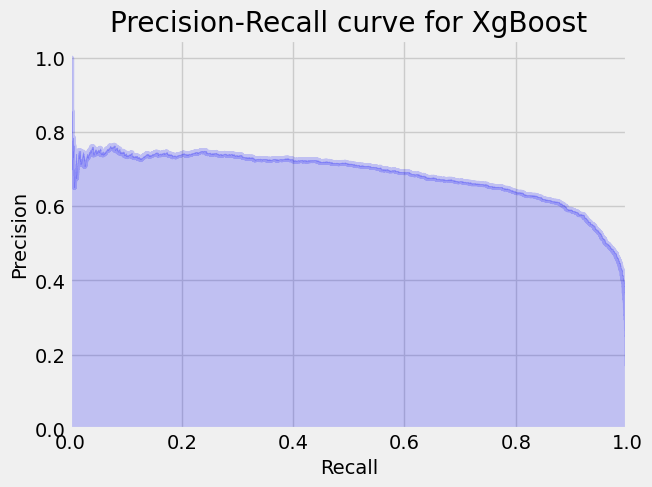

In [96]:
sampler = SMOTE()
skf = StratifiedKFold(n_splits=cv,  shuffle=False)
clf = xgb_clf

train_idx, test_idx = skf.split(X_train_dt, y_train).__next__()
#print(train_idx)
xfold_train_sampled, yfold_train_sampled = sampler.fit_resample(X_train_dt.iloc[train_idx],y_train.iloc[train_idx])

clf.fit(xfold_train_sampled, yfold_train_sampled)

precisions, recalls,_ = precision_recall_curve(y_train.iloc[test_idx], clf.predict_proba(X_train_dt.iloc[test_idx])[:,1], pos_label=1)

plt.step(recalls, precisions, color='b', alpha=0.2,
         where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for XgBoost')
plt.show()

## Class Weights

### Balanced Weights

In [98]:

%%time
clf_logistic = LogisticRegression(class_weight='balanced')

metrics = ['accuracy', 'neg_log_loss','roc_auc','f1','precision', 'recall',]
scores = cross_validate(clf_logistic, X_train_ohe, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))

LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision'].mean()
LR_recall = scores['test_recall'].mean()
LR_f1 = scores['test_f1'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.82
LogLoss: -0.43
AUC: 0.89
F1: 0.62
CPU times: user 37.1 s, sys: 6.26 s, total: 43.4 s
Wall time: 6.86 s


### For misclassifying 1 class ,loss function will be penalised by 0.95 whereas for misclassifying 0 class loss function with be penalised by 0.05

In [100]:

%%time
clf_logistic = LogisticRegression(class_weight={1:0.95,0:0.05})

metrics = ['accuracy', 'neg_log_loss','roc_auc','f1','precision', 'recall',]
scores = cross_validate(clf_logistic, X_train_ohe, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))

LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision'].mean()
LR_recall = scores['test_recall'].mean()
LR_f1 = scores['test_f1'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.69
LogLoss: -0.76
AUC: 0.89
F1: 0.51
CPU times: user 34.5 s, sys: 6.67 s, total: 41.2 s
Wall time: 6.46 s


### Looping through different weights

In [ ]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train_non_dt.shape,y_train_non_dt.shape))
print('X_val Shape:{}--y_val Shape:{}'.format(X_val_non_dt.shape,y_val_non_dt.shape))
# print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

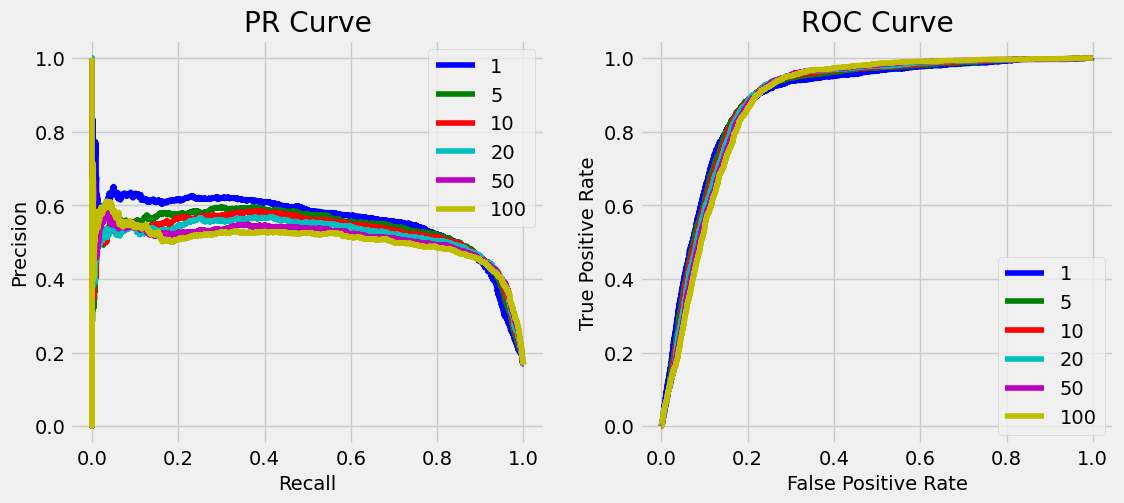

In [105]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for w,k in zip([1,5,10,20,50,100],'bgrcmykw'):
    lr_model = LogisticRegression(class_weight={0:1,1:w})
    lr_model.fit(X_train_non_dt,y_train_non_dt)
    pred_prob = lr_model.predict_proba(X_val_non_dt)[:,1]

    p,r,_ = precision_recall_curve(y_val_non_dt,pred_prob)
    tpr,fpr,_ = roc_curve(y_val_non_dt,pred_prob)
    
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
ax1.legend(loc='upper right')    
ax2.legend(loc='lower right')

plt.show()

1--0.8893603677345521
5--0.8906081708683968
10--0.8899461846740216
20--0.8884633894939481
50--0.8853715240672109
100--0.8826358309606759


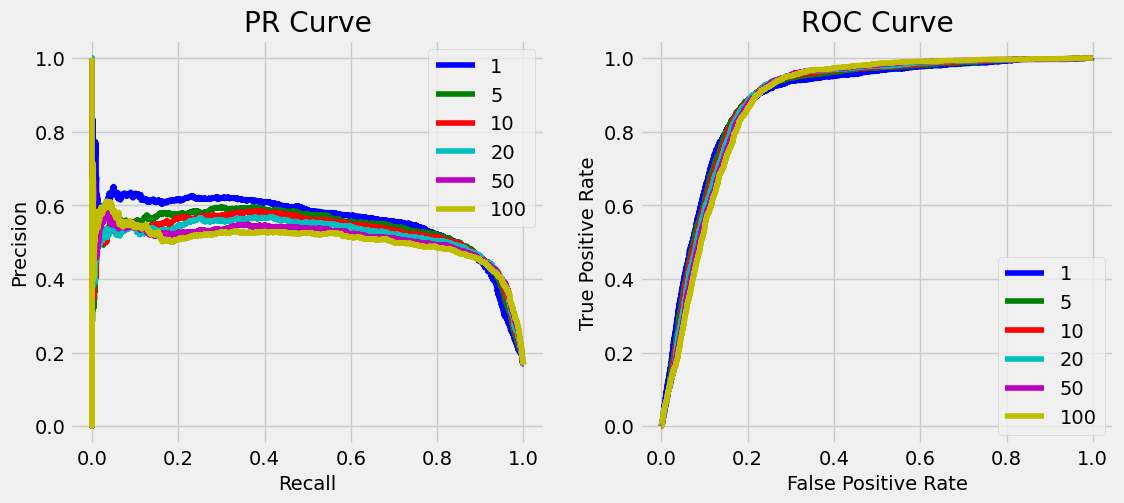

In [155]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for w,k in zip([1,5,10,20,50,100],'bgrcmykw'):
    lr_model = LogisticRegression(class_weight={0:1,1:w})
    lr_model.fit(X_train_non_dt,y_train_non_dt)
    pred_prob = lr_model.predict_proba(X_val_non_dt)[:,1]

    p,r,_ = precision_recall_curve(y_val_non_dt,pred_prob)
    tpr,fpr,_ = roc_curve(y_val_non_dt,pred_prob)
    print("{}--{}".format(w,roc_auc_score(y_val_non_dt,pred_prob)))
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
ax1.legend(loc='upper right')    
ax2.legend(loc='lower right')

plt.show()

## More Resampling + Logistic Regression

In [114]:
def benchmark(sampling_type,X,y):
    lr = LogisticRegression(penalty = 'l2')
    param_grid = {'C':[0.01,0.1,1,10]}
    gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
    gs = gs.fit(X.values,y.values.ravel())
    return sampling_type,gs.best_score_,gs.best_params_['C']

def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    skf = StratifiedKFold(n_splits=5,  shuffle=False)
    
    for train_idx, test_idx in skf.split(X,y):
        X_resampled,y_resampled = transformer.fit_resample(X.iloc[train_idx],y.iloc[train_idx])
    
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [112]:
datasets = []
datasets.append(("base",X_train,y_train))
datasets.append(transform(SMOTE(n_jobs=-1),X_train_non_dt,y_train_non_dt))
datasets.append(transform(RandomOverSampler(),X_train_non_dt,y_train_non_dt))
#datasets.append(transform(ClusterCentroids(n_jobs=-1),X_train,y_train))
datasets.append(transform(NearMiss(n_jobs=-1),X_train_non_dt,y_train_non_dt))
datasets.append(transform(RandomUnderSampler(),X_train_non_dt,y_train_non_dt))
datasets.append(transform(SMOTEENN(),X_train_non_dt,y_train_non_dt))
datasets.append(transform(SMOTETomek(),X_train_non_dt,y_train_non_dt))


Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


In [115]:
benchmark_scores = []
for sample_type,X,y in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X_train_non_dt,y_train_non_dt))
    print('______________________________________________________________')
    

______________________________________________________________
base
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................................C=0.01; total time=   0.8s
[CV] END .............................................C=0.01; total time=   0.6s
[CV] END .............................................C=0.01; total time=   0.7s
[CV] END .............................................C=0.01; total time=   0.6s
[CV] END .............................................C=0.01; total time=   0.7s
[CV] END ..............................................C=0.1; total time=   0.9s
[CV] END ..............................................C=0.1; total time=   1.0s
[CV] END ..............................................C=0.1; total time=   1.0s
[CV] END ..............................................C=0.1; total time=   0.9s
[CV] END ..............................................C=0.1; total time=   0.9s
[CV] END ................................................C=1; 

In [116]:
benchmark_scores

[('base', 0.5229175776958325, 10),
 ('SMOTE', 0.5229175776958325, 10),
 ('RandomOverSampler', 0.5229175776958325, 10),
 ('NearMiss', 0.5229175776958325, 10),
 ('RandomUnderSampler', 0.5229175776958325, 10),
 ('SMOTEENN', 0.5229175776958325, 10),
 ('SMOTETomek', 0.5229175776958325, 10)]

In [124]:
scores = []
# train models based on benchmark params
for sampling_type,score,param in benchmark_scores:
    print("Training on {}".format(sampling_type))
    lr = LogisticRegression(penalty = 'l2',C=param)
    for s_type,X,y in datasets:
        if s_type == sampling_type:
            lr.fit(X_train_non_dt.values,y_train_non_dt.values.ravel())
            pred_test = lr.predict(X_val_non_dt.values)
            pred_test_probs = lr.predict_proba(X_val_non_dt.values)
            probs = lr.decision_function(X_val_non_dt.values)
            fpr, tpr, thresholds = roc_curve(y_val_non_dt.values.ravel(),pred_test)
            p,r,t = precision_recall_curve(y_val_non_dt.values.ravel(),probs)
            scores.append((sampling_type,
                           f1_score(y_val_non_dt.values.ravel(),pred_test),
                           precision_score(y_val_non_dt.values.ravel(),pred_test),
                           recall_score(y_val_non_dt.values.ravel(),pred_test),
                           accuracy_score(y_val_non_dt.values.ravel(),pred_test),
                           auc(fpr, tpr),
                           confusion_matrix(y_val_non_dt.values.ravel(),pred_test)))

Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


In [125]:
sampling_results = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc','confusion_matrix'])
sampling_results['Model']='LogisticRegression'
sampling_results

,Sampling Type,f1,precision,recall,accuracy,auc_roc,confusion_matrix,Model
0,base,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
1,SMOTE,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
2,RandomOverSampler,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
3,NearMiss,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
4,RandomUnderSampler,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
5,SMOTEENN,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
6,SMOTETomek,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression


In [132]:
sampling_results

,Sampling Type,f1,precision,recall,accuracy,auc_roc,confusion_matrix,Model
0,base,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
1,SMOTE,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
2,RandomOverSampler,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
3,NearMiss,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
4,RandomUnderSampler,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
5,SMOTEENN,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
6,SMOTETomek,0.514019,0.597826,0.45082,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression


## More Sampling + Random Forest

In [128]:
def benchmark(sampling_type,X,y):
    lr = RandomForestClassifier()
    param_grid = param_grid = {
    'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]}
    gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
    gs = gs.fit(X.values,y.values.ravel())
    return sampling_type,gs.best_score_,gs.best_params_['n_estimators'],gs.best_params_['max_features'],\
gs.best_params_['bootstrap'],gs.best_params_['max_depth']

def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for train_idx, test_idx in skf.split(X,y):
        X_resampled,y_resampled = transformer.fit_resample(X.iloc[train_idx],y.iloc[train_idx])
    
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [129]:
datasets = []
datasets.append(("base",X_train_for_dt,y_train_for_dt))
datasets.append(transform(SMOTE(n_jobs=-1),X_train_for_dt,y_train_for_dt))
datasets.append(transform(RandomOverSampler(),X_train_for_dt,y_train_for_dt))
#datasets.append(transform(ClusterCentroids(n_jobs=-1),X_train,y_train))
datasets.append(transform(NearMiss(n_jobs=-1),X_train_for_dt,y_train_for_dt))
datasets.append(transform(RandomUnderSampler(),X_train_for_dt,y_train_for_dt))
datasets.append(transform(SMOTEENN(),X_train_for_dt,y_train_for_dt))
datasets.append(transform(SMOTETomek(),X_train_for_dt,y_train_for_dt))


Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


In [130]:
benchmark_scores = []
for sample_type,X_train_for_dt,y_train_for_dt in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X,y))
    print('______________________________________________________________')
    

______________________________________________________________
base
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=200; total time=  16.3s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=200; total time=  15.4s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=200; total time=  15.1s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=200; total time=  14.6s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=200; total time=  14.4s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=500; total time=  39.5s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=500; total time=  38.4s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=500; total time=  42.3s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, n_estimators=500; total time=  38.9s
[CV] END bootstrap=False,

In [131]:
benchmark_scores

[('base', 0.9098491709735285, 200, 0.7, True, 6),
 ('SMOTE', 0.91010026611709, 200, 0.7, True, 6),
 ('RandomOverSampler', 0.9100041489817869, 500, 0.7, True, 6),
 ('NearMiss', 0.909887451979241, 500, 0.7, True, 6),
 ('RandomUnderSampler', 0.9098379271138108, 200, 0.7, True, 6),
 ('SMOTEENN', 0.909869372774452, 500, 0.7, True, 6),
 ('SMOTETomek', 0.909781919868465, 500, 0.7, True, 6)]

In [137]:
scores = []
# train models based on benchmark params
for sampling_type,score,n_est,n_max,n_boot,n_dep in benchmark_scores:
    print("Training on {}".format(sampling_type))
    lr = RandomForestClassifier(n_estimators=n_est,
    max_features=n_max,bootstrap=n_boot,max_depth=n_dep)
    for s_type,X,y in datasets:
        if s_type == sampling_type:
            lr.fit(X_train_non_dt.values,y_train_non_dt.values.ravel())
            pred_test = lr.predict(X_val_non_dt.values)
            pred_test_probs = lr.predict_proba(X_val_non_dt.values)
            #probs = lr.decision_function(X_test.values)
            fpr, tpr, thresholds = roc_curve(y_val_non_dt.values.ravel(),pred_test)
            #p,r,t = precision_recall_curve(y_test.values.ravel(),probs)
            scores.append((sampling_type,
                           f1_score(y_val_non_dt.values.ravel(),pred_test),
                           precision_score(y_val_non_dt.values.ravel(),pred_test),
                           recall_score(y_val_non_dt.values.ravel(),pred_test),
                           accuracy_score(y_val_non_dt.values.ravel(),pred_test),
                           auc(fpr, tpr),
                           confusion_matrix(y_val_non_dt.values.ravel(),pred_test)))
            scores1 = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc',\
                                      'confusion_matrix'])
            scores1['Model']='RandomForest'
            
            
            
            
            

Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


In [141]:
sampling_results = pd.concat([sampling_results,scores1])
sampling_results.drop_duplicates(subset=['Model','Sampling Type'],keep='first').reset_index(drop=True)

,Sampling Type,f1,precision,recall,accuracy,auc_roc,confusion_matrix,Model
0,base,0.514019,0.597826,0.450820,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
1,SMOTE,0.514019,0.597826,0.450820,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
2,RandomOverSampler,0.514019,0.597826,0.450820,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
3,NearMiss,0.514019,0.597826,0.450820,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
4,RandomUnderSampler,0.514019,0.597826,0.450820,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
5,SMOTEENN,0.514019,0.597826,0.450820,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
6,SMOTETomek,0.514019,0.597826,0.450820,0.856122,0.694619,"[[10149, 666], [1206, 990]]",LogisticRegression
7,base,0.563700,0.694204,0.474499,0.876028,0.716029,"[[10356, 459], [1154, 1042]]",RandomForest
8,SMOTE,0.557493,0.694030,0.465847,0.875183,0.712073,"[[10364, 451], [1173, 1023]]",RandomForest
9,RandomOverSampler,0.558632,0.691532,0.468579,0.875029,0.713069,"[[10356, 459], [1167, 1029]]",RandomForest


In [145]:
t1=sampling_results.drop_duplicates(subset=['Model','Sampling Type'],keep='first').reset_index(drop=True)
t1.columns

Index(['Sampling Type', 'f1', 'precision', 'recall', 'accuracy', 'auc_roc',
       'confusion_matrix', 'Model'],
      dtype='object')

In [151]:
t2=t1[['Sampling Type','Model','auc_roc','f1', 'precision', 'recall',]].sort_values(by='auc_roc',ascending=False).reset_index(drop=True)
t2.head(10)

,Sampling Type,Model,auc_roc,f1,precision,recall
0,RandomUnderSampler,RandomForest,0.716627,0.565312,0.698126,0.474954
1,base,RandomForest,0.716029,0.563700,0.694204,0.474499
2,NearMiss,RandomForest,0.713211,0.559456,0.695064,0.468124
3,RandomOverSampler,RandomForest,0.713069,0.558632,0.691532,0.468579
4,SMOTETomek,RandomForest,0.712888,0.558392,0.691790,0.468124
5,SMOTEENN,RandomForest,0.712390,0.557823,0.693036,0.466758
6,SMOTE,RandomForest,0.712073,0.557493,0.694030,0.465847
7,base,LogisticRegression,0.694619,0.514019,0.597826,0.450820
8,SMOTE,LogisticRegression,0.694619,0.514019,0.597826,0.450820
9,RandomOverSampler,LogisticRegression,0.694619,0.514019,0.597826,0.450820


In [153]:
t2.head(10).to_csv('Class_balancing.csv',index=False,encoding='utf-8')

## Stop